# Signal Background Preparation

In [177]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## 3.1 Preparation of Data

In [178]:
signal = pd.read_csv('icecube/signal_train.csv')
background = pd.read_csv('icecube/background_train.csv')
test = pd.read_csv('icecube/test.csv')

Remove all coluns not common to both signal and background

In [179]:
signal = signal[signal.columns.intersection(background.columns)]
background = background[background.columns.intersection(signal.columns)]
test = test[test.columns.intersection(signal.columns)]

In [180]:
#remove all columns with 'corsica' in the name
signal = signal.loc[:,~signal.columns.str.contains('Corsika')]
background = background.loc[:,~background.columns.str.contains('Corsika')]
test = test.loc[:,~test.columns.str.contains('Corsika')]


#remove all columns with 'Weight' in the name
signal = signal.loc[:,~signal.columns.str.contains('Weight')]
background = background.loc[:,~background.columns.str.contains('Weight')]
test = test.loc[:,~test.columns.str.contains('Weight')]


#remove all columns with 'MC' in the name
signal = signal.loc[:,~signal.columns.str.contains('MC')]
background = background.loc[:,~background.columns.str.contains('MC')]
test = test.loc[:,~test.columns.str.contains('MC')]

#remove all columns with 'I3EventHeader' in the name
signal = signal.loc[:,~signal.columns.str.contains('I3EventHeader')]
background = background.loc[:,~background.columns.str.contains('I3EventHeader')]
test = test.loc[:,~test.columns.str.contains('I3EventHeader')]


#reste index
signal = signal.reset_index(drop=True)
background = background.reset_index(drop=True)
test = test.reset_index(drop=True)

In [181]:
#check for nan values
print('Signal nan: ',signal.isnull().sum().sum())
print('Background nan: ',background.isnull().sum().sum())
print('Test nan: ',test.isnull().sum().sum())

#check for inf values
print('Signal inf: ',np.isinf(signal).sum().sum())
print('Background inf: ',np.isinf(background).sum().sum())
print('Test inf: ',np.isinf(test).sum().sum())

Signal nan:  326116
Background nan:  342631
Test nan:  74255
Signal inf:  0
Background inf:  0
Test inf:  0


In [182]:
#print the numbner of nan per feature
list_nan = signal.isnull().sum()
print('Signal nan per feature: ',list_nan[list_nan>0])

Signal nan per feature:  LineFit_TT.energy                                             17933
LineFit_TT.length                                             17933
MPEFitHighNoise.energy                                        17933
MPEFitHighNoise.length                                        17933
MPEFitHighNoiseFitParams.logl                                     6
MPEFitHighNoiseFitParams.rlogl                                    6
MPEFitParaboloid.length                                       17933
MPEFit_TT.energy                                              17933
MPEFit_TT.length                                              17933
MPEFit_TTFitParams.logl                                           2
MPEFit_TTFitParams.rlogl                                          2
MuEXAngular4.energy                                           17933
MuEXAngular4.length                                           17933
SPEFit2Bayesian.energy                                        17932
SPEFit2Bayesian.length 

In [183]:
#print the feature type if is not float
list_nan = signal.dtypes
print('Signal feature type: ',list_nan[list_nan!='float64'])

Signal feature type:  label    int64
dtype: object


In [184]:
#replace nan values with the mean
signal.fillna(signal.mean(), inplace=True)
background.fillna(background.mean(), inplace=True)
test.fillna(test.mean(), inplace=True)

In [185]:
#check for nan values
print('Signal nan: ',signal.isnull().sum().sum())
print('Background nan: ',background.isnull().sum().sum())
print('Test nan: ',test.isnull().sum().sum())

#check for inf values
print('Signal inf: ',np.isinf(signal).sum().sum())
print('Background inf: ',np.isinf(background).sum().sum())
print('Test inf: ',np.isinf(test).sum().sum())

Signal nan:  286928
Background nan:  289072
Test nan:  64000
Signal inf:  0
Background inf:  0
Test inf:  0


In [186]:
#print the numbner of nan per feature
list_nan = signal.isnull().sum()
list_nan_bkg = background.isnull().sum()
list_nan_test = test.isnull().sum()
print('Signal nan per feature: ',list_nan[list_nan>0])
print('Background nan per feature: ',list_nan_bkg[list_nan_bkg>0])
print('Test nan per feature: ',list_nan_test[list_nan_test>0])

#remove all the list_nan features
signal = signal.drop(list_nan[list_nan>0].index, axis=1)
background = background.drop(list_nan[list_nan>0].index, axis=1)
test = test.drop(list_nan[list_nan>0].index, axis=1)

Signal nan per feature:  LineFit_TT.energy                                        17933
LineFit_TT.length                                        17933
MPEFitHighNoise.energy                                   17933
MPEFitHighNoise.length                                   17933
MPEFitParaboloid.length                                  17933
MPEFit_TT.energy                                         17933
MPEFit_TT.length                                         17933
MuEXAngular4.energy                                      17933
MuEXAngular4.length                                      17933
SPEFit2_TT.energy                                        17933
SPEFit2_TT.length                                        17933
SplineMPE.energy                                         17933
SplineMPE.length                                         17933
SplineMPEMuEXDifferential.length                         17933
SplineMPETruncatedEnergy_SPICEMie_AllBINS_Muon.length    17933
SplineMPETruncatedEnergy_SPICE

In [187]:
#remove labels
signal = signal.drop(columns=['label'])
background = background.drop(columns=['label'])

In [188]:
#check for nan values
print('Signal nan: ',signal.isnull().sum().sum())
print('Background nan: ',background.isnull().sum().sum())
print('Test nan: ',test.isnull().sum().sum())

#check for inf values
print('Signal inf: ',np.isinf(signal).sum().sum())
print('Background inf: ',np.isinf(background).sum().sum())
print('Test inf: ',np.isinf(test).sum().sum())

Signal nan:  0
Background nan:  0
Test nan:  0
Signal inf:  0
Background inf:  0
Test inf:  0


Remove all the features that contain the string `Corsika` in the name.

In [189]:
#check the features that are not common to both signal and background and test
for i in test.columns:
    if i not in signal.columns:
        print(i)


for i in signal.columns:
    if i not in test.columns:
        print(i)

In [190]:
print('Check: ',(signal.keys() != background.keys()).sum())
print('Check: ',(signal.keys() != test.keys()).sum())
print('Check: ',(background.keys() != test.keys()).sum())

Check:  0
Check:  0
Check:  0


In [191]:
signal.describe()

,HitMultiplicityValues.n_hit_strings,HitMultiplicityValues.n_hit_doms,HitMultiplicityValues.n_hit_doms_one_pulse,HitStatisticsValues.cog_z_sigma,HitStatisticsValues.min_pulse_time,HitStatisticsValues.max_pulse_time,HitStatisticsValues.q_max_doms,HitStatisticsValues.z_min,HitStatisticsValues.z_max,HitStatisticsValues.z_mean,...,SplineMPETruncatedEnergy_SPICEMie_AllDOMS_Muon.fit_status,NewID,NewAtt.radius,NewAtt.DirectEllipse,NewAtt.DeltaZd,NewAtt.AbsSmooth,NewAtt.emptyness,NewAtt.SepDevide,NewAtt.SPEBayVerRadius,NewAtt.SplineVerRadius
count,17933.000000,17933.000000,17933.000000,17933.000000,17933.000000,17933.000000,17933.000000,17933.000000,17933.000000,17933.000000,...,17933.0,1.793300e+04,17933.000000,17933.000000,17933.000000,17933.000000,17933.0,17933.000000,17933.000000,17933.000000
mean,9.436123,30.803268,21.039648,88.098802,9916.570989,12508.058351,14.644566,-244.259084,89.616664,-89.465033,...,0.0,1.527185e+06,306.148114,84.320418,0.052652,0.302715,1.0,0.726818,395.993352,313.880923
std,5.301590,27.076982,16.182711,59.831656,877.429913,1383.063934,65.807592,269.671420,275.568145,261.120646,...,0.0,8.845869e+05,141.131022,79.490349,0.073211,0.120100,0.0,0.237890,224.976585,140.230348
min,1.000000,8.000000,1.000000,8.796791,8277.723633,10152.000000,1.138893,-512.820007,-453.649994,-481.802501,...,0.0,6.400000e+01,2.880830,11.338109,0.000003,0.000024,1.0,-0.350257,0.000000,2.419013
25%,6.000000,16.000000,11.000000,45.878580,9867.423828,11739.972656,3.765426,-491.480011,-161.720001,-325.474055,...,0.0,7.631700e+05,192.508510,29.793645,0.012922,0.212787,1.0,0.585834,246.889985,204.688250
50%,8.000000,22.000000,16.000000,71.058195,9877.030273,12289.954102,6.053748,-368.399994,112.800003,-168.016669,...,0.0,1.526188e+06,325.129144,54.825834,0.030924,0.285216,1.0,0.740579,386.574018,330.505668
75%,12.000000,35.000000,25.000000,108.841056,9885.083008,13023.685547,11.268575,0.440000,344.350006,148.016297,...,0.0,2.295915e+06,420.299276,110.712100,0.065019,0.374648,1.0,0.868732,501.467822,427.290290
max,57.000000,720.000000,243.000000,405.906352,49808.296875,57779.906250,4631.879805,451.279999,524.559998,483.326999,...,0.0,3.053671e+06,600.071165,613.402922,1.431678,0.819206,1.0,3.028801,2121.545264,607.249653


In [192]:
background.describe()

,HitMultiplicityValues.n_hit_strings,HitMultiplicityValues.n_hit_doms,HitMultiplicityValues.n_hit_doms_one_pulse,HitStatisticsValues.cog_z_sigma,HitStatisticsValues.min_pulse_time,HitStatisticsValues.max_pulse_time,HitStatisticsValues.q_max_doms,HitStatisticsValues.z_min,HitStatisticsValues.z_max,HitStatisticsValues.z_mean,...,SplineMPETruncatedEnergy_SPICEMie_AllDOMS_Muon.fit_status,NewID,NewAtt.radius,NewAtt.DirectEllipse,NewAtt.DeltaZd,NewAtt.AbsSmooth,NewAtt.emptyness,NewAtt.SepDevide,NewAtt.SPEBayVerRadius,NewAtt.SplineVerRadius
count,18067.000000,18067.000000,18067.000000,18067.000000,18067.000000,18067.000000,18067.000000,18067.000000,18067.000000,18067.000000,...,18067.0,1.806700e+04,18067.000000,18067.000000,18067.000000,18067.000000,18067.0,18067.000000,18067.000000,18067.000000
mean,7.885205,24.545470,15.011623,44.316044,9937.158213,12308.492053,16.985691,32.413399,214.976684,120.258379,...,0.0,1.920430e+06,404.146222,33.632866,0.129398,0.373258,1.0,0.710548,410.047943,412.979125
std,4.701896,25.130847,12.701282,34.133140,1040.806090,1504.080989,95.693200,380.274064,348.112860,377.122742,...,0.0,1.638745e+06,116.760778,29.756224,0.153940,0.159605,0.0,0.365554,153.368978,116.722454
min,1.000000,8.000000,1.000000,8.958271,8415.588867,10027.590820,1.100601,-512.820007,-454.540009,-490.288333,...,0.0,1.070000e+02,0.777723,11.163259,0.000003,0.000013,1.0,-1.300890,0.000000,4.396879
25%,5.000000,14.000000,9.000000,26.601928,9787.818359,11539.096191,3.353425,-498.500000,-213.105003,-371.608228,...,0.0,2.221960e+05,340.527579,16.560633,0.045893,0.253163,1.0,0.459009,326.974883,353.224964
50%,7.000000,18.000000,12.000000,34.896551,9876.305664,12041.258789,5.563989,193.220001,445.880005,291.515250,...,0.0,1.679429e+06,433.908461,25.905876,0.091134,0.350461,1.0,0.705945,441.017295,442.985797
75%,9.000000,25.000000,17.000000,48.172739,9885.570312,12686.522461,11.475122,382.940002,501.480011,452.703786,...,0.0,3.368290e+06,491.187713,38.958815,0.154326,0.487400,1.0,0.915557,511.895642,498.591344
max,54.000000,530.000000,237.000000,449.089998,33612.394531,41629.847656,6506.370362,465.769989,524.559998,494.442999,...,0.0,5.028202e+06,599.857338,424.930724,2.304295,0.868363,1.0,3.658548,2026.358092,630.270158


In [193]:
#check for the shape
print('Signal shape: ',signal.shape)
print('Background shape: ',background.shape)
print('Test shape: ',test.shape)


Signal shape:  (17933, 172)
Background shape:  (18067, 172)
Test shape:  (4000, 172)


Adding `label` column to the dataframes to distinguish between signal and background events.`

In [194]:
#add labels
signal['label'] = 1
background['label'] = 0

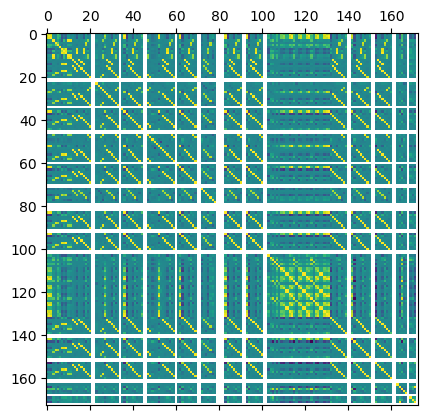

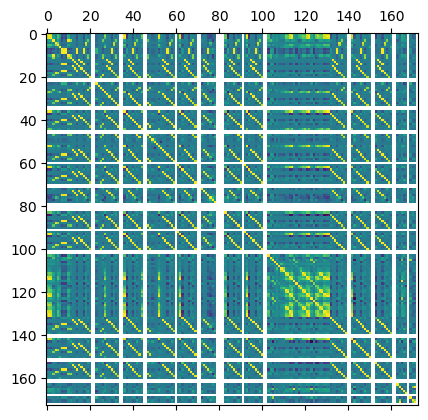

In [195]:
#plot the correlation matrix for signal
correlation_matrix = signal.corr()
plt.matshow(correlation_matrix)
plt.show()

#plot the correlation matrix for background
correlation_matrix = background.corr()
plt.matshow(correlation_matrix)
plt.show()

This is why we still see white space in the dataframes.

In [196]:
#print per every column all the possible values that that columns chan have if <10
count1 = 0
count2 = 0

for i in signal.columns:
    count1 += 1
    if len(signal[i].unique()) < 10:
        print(count1,i, signal[i].unique())

print('-------------------')

for i in background.columns:
    count2 += 1
    if len(background[i].unique()) < 10:
        print(count2,i, background[i].unique())


22 LineFit_TT.type [0.]
23 LineFit_TT.fit_status [0.]
35 MPEFitHighNoise.type [0.]
36 MPEFitHighNoise.fit_status [ 0. 30.]
46 MPEFitParaboloid.type [0.]
47 MPEFitParaboloid.fit_status [0.]
54 MPEFitParaboloidFitParams.status [ 0. 22. 20.]
61 MPEFit_TT.type [0.]
62 MPEFit_TT.fit_status [ 0. 30.]
71 MuEXAngular4.type [0.]
72 MuEXAngular4.fit_status [0.]
80 SPEFit2Bayesian.energy [0.]
81 SPEFit2Bayesian.length [0.]
82 SPEFit2Bayesian.type [0.]
83 SPEFit2Bayesian.fit_status [0.]
92 SPEFit2_TT.type [0.]
93 SPEFit2_TT.fit_status [0.]
102 SplineMPE.type [0.]
103 SplineMPE.fit_status [0.]
112 SplineMPEDirectHitsA.n_early_strings [0. 1. 2. 3. 5. 4.]
120 SplineMPEDirectHitsC.n_early_strings [0. 1. 2. 3. 5. 4.]
128 SplineMPEDirectHitsE.n_early_strings [0. 1. 2. 3. 5. 4.]
141 SplineMPEMuEXDifferential.type [0.]
142 SplineMPEMuEXDifferential.fit_status [0.]
152 SplineMPETruncatedEnergy_SPICEMie_AllBINS_Muon.type [0.]
153 SplineMPETruncatedEnergy_SPICEMie_AllBINS_Muon.fit_status [0.]
162 SplineMPETr

In [ ]:
#remove all the features that have only one value
signal = signal.loc[:,signal.apply(pd.Series.nunique) != 1]
background = background.loc[:,background.apply(pd.Series.nunique) != 1]
test = test.loc[:,test.apply(pd.Series.nunique) != 1]

#check for the shape
print('Signal shape: ',signal.shape)
print('Background shape: ',background.shape)
print('Test shape: ',test.shape)

## 3.2 Attributes Selection

### Forward Selection

In [197]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [198]:
#merge signal and bkg
data = pd.concat([signal, background], ignore_index=True)

#randomize the data
data = data.sample(frac=1).reset_index(drop=True)

In [199]:
X = data.drop(columns=['label'])  
y = data['label']


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Forward Selection Function
def forward_selection(X_train, y_train, X_test, y_test):
    selected_features = []
    remaining_features = list(X_train.columns)
    best_accuracy = 0

    while remaining_features:
        accuracy_with_candidates = []
        for feature in remaining_features:
            candidates = selected_features + [feature]
            model = RandomForestClassifier(n_estimators=100, random_state=42)
            model.fit(X_train[candidates], y_train)
            y_pred = model.predict(X_test[candidates])
            accuracy = accuracy_score(y_test, y_pred)
            accuracy_with_candidates.append((accuracy, feature))
            print('Model with features:', candidates, 'Accuracy:', accuracy)
        
        accuracy_with_candidates.sort(reverse=True)
        best_new_accuracy, best_new_feature = accuracy_with_candidates[0]
        
        if best_new_accuracy > best_accuracy:
            best_accuracy = best_new_accuracy
            selected_features.append(best_new_feature)
            remaining_features.remove(best_new_feature)
        else:
            break
    
    return selected_features

# Perform Forward Selection
selected_features_fs = forward_selection(X_train, y_train, X_test, y_test)
print("Selected Features by Forward Selection:", selected_features_fs)

# Using selected features to train and evaluate the final model
X_train_fs = X_train[selected_features_fs]
X_test_fs = X_test[selected_features_fs]

model_fs = RandomForestClassifier(n_estimators=100, random_state=42)
model_fs.fit(X_train_fs, y_train)
y_pred_fs = model_fs.predict(X_test_fs)
accuracy_fs = accuracy_score(y_test, y_pred_fs)
print(f'Accuracy with Forward Selection: {accuracy_fs:.2f}')


Model with features: ['HitMultiplicityValues.n_hit_strings'] Accuracy: 0.5984722222222222
Model with features: ['HitMultiplicityValues.n_hit_doms'] Accuracy: 0.5931944444444445
Model with features: ['HitMultiplicityValues.n_hit_doms_one_pulse'] Accuracy: 0.6223611111111111
Model with features: ['HitStatisticsValues.cog_z_sigma'] Accuracy: 0.6427777777777778
Model with features: ['HitStatisticsValues.min_pulse_time'] Accuracy: 0.5691666666666667
Model with features: ['HitStatisticsValues.max_pulse_time'] Accuracy: 0.5170833333333333
Model with features: ['HitStatisticsValues.q_max_doms'] Accuracy: 0.51875
Model with features: ['HitStatisticsValues.z_min'] Accuracy: 0.7352777777777778
Model with features: ['HitStatisticsValues.z_max'] Accuracy: 0.7241666666666666
Model with features: ['HitStatisticsValues.z_mean'] Accuracy: 0.7138888888888889
Model with features: ['HitStatisticsValues.z_sigma'] Accuracy: 0.6277777777777778
Model with features: ['HitStatisticsValues.z_travel'] Accuracy: 0

### mRMR Selection

In [201]:
from mrmr import mrmr_classif

In [202]:
# Separate features and target
X = data.drop('label', axis=1)
y = data['label']

In [208]:
# Perform mRMR selection to choose the top k features
selected_features = mrmr_classif(X=X, y=y, K=150)

# Display the selected features
print("Selected features using mRMR:")
print(selected_features)

# Filter the dataset to include only the selected features
data_selected = X[selected_features]
data_selected['label'] = y

100%|██████████| 150/150 [00:34<00:00,  4.38it/s]

Selected features using mRMR:
['LineFit_TTParams.lf_vel_z', 'SplineMPEDirectHitsC.n_dir_strings', 'HitStatisticsValues.z_travel', 'SplineMPEFitParams.rlogl', 'SplineMPECharacteristics.avg_dom_dist_q_tot_dom', 'SplineMPEDirectHitsA.dir_track_length', 'LineFit_TT.zenith', 'SplineMPEDirectHitsA.n_dir_strings', 'MuEXAngular4.zenith', 'NewAtt.SplineVerRadius', 'SplineMPE.zenith', 'MuEXAngular4_Sigma.value', 'SplineMPEDirectHitsA.n_dir_doms', 'MPEFitHighNoise.zenith', 'SplineMPEMuEXDifferential.zenith', 'MPEFit_TTFitParams.rlogl', 'NewAtt.DeltaZd', 'SPEFit2_TT.zenith', 'SplineMPETruncatedEnergy_SPICEMie_AllBINS_Muon.zenith', 'SplineMPEDirectHitsC.dir_track_length', 'SplineMPETruncatedEnergy_SPICEMie_AllDOMS_Muon.zenith', 'MPEFitHighNoiseFitParams.rlogl', 'MPEFit_TT.zenith', 'NewAtt.radius', 'MPEFitParaboloid.zenith', 'MPEFitParaboloidFitParams.zenith', 'LineFit_TTParams.lf_vel', 'SplineMPETruncatedEnergy_SPICEMie_AllDOMS_MuEres.value', 'SPEFit2Bayesian.z', 'SplineMPECharacteristics.track_hit

## Multivariate Models

Preproces data

In [209]:
#preprocess data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_selected_scaled = scaler.fit_transform(data_selected.drop(columns=['label']))
data_selected_scaled = pd.DataFrame(data_selected_scaled, columns=data_selected.drop(columns=['label']).columns)
data_selected_scaled['label'] = data_selected['label']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(data_selected_scaled.drop(columns=['label']), data_selected_scaled['label'], test_size=0.2, random_state=42)

#kfold cross validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, random_state=42, shuffle=True)
model = RandomForestClassifier(n_estimators=100, random_state=42)
scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='accuracy')
print('Cross-validated accuracy:', scores.mean())

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Cross-validated accuracy: 0.9778125
Accuracy: 0.98
